# Section 3 - Plotly Basics

The documentation for Plotly can be found at the following URL: www.plot.ly/python

Select the 'Figure Reference' or 'API reference' tabs to search for more details on a parameter/function.

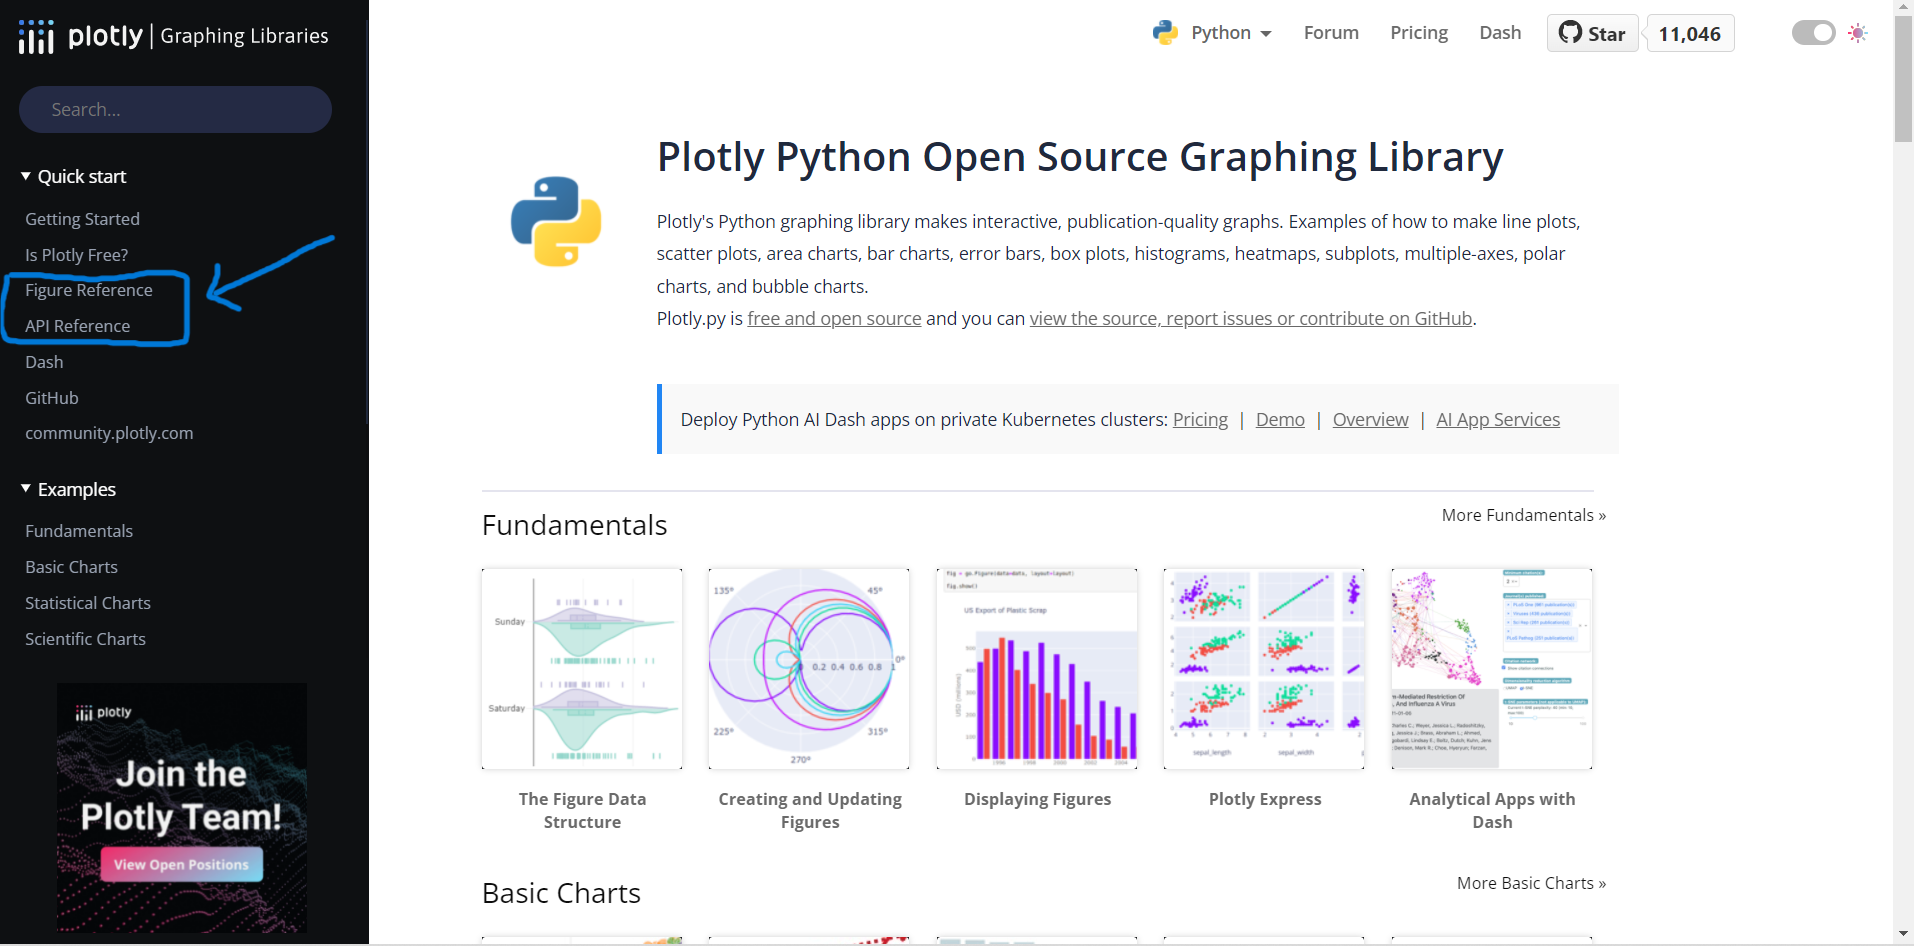

Note: This screenshot was taken as of February 24th, 2022. The structure of the Plotly website may be subject to change in the future.

All csv files used in this notebook (with the exception of the DOW Industrials CSV file) were retrieved from the following link:

https://github.com/Pierian-Data/Plotly-Dashboards-with-Dash/tree/master/Data

## Scatter Plots

In [1]:
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go

# The random seed works such that it sets the starting seed for each instance
# a randomizing generator is called

# For example: if you set the starting seed at 42, the first call uses that seed.
# The next call uses the 43th seed and continues on for each new call.

np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

random_x_2 = np.random.randint(1,101,100)
random_y_2 = np.random.randint(1,101,100)

# Generates plotly graphs inline the notebook
pyo.init_notebook_mode(connected=True)

# Default mode uses markers and lines for the scatter plot
data_mode_default= [go.Scatter(x=random_x, y=random_y, name='Seed 42/43'),
                     go.Scatter(x=random_x_2, y=random_y_2, name='Seed 44/45')]

pyo.iplot({'data':data_mode_default, 
           'layout': go.Layout(title={'text':'99 Random Connections for Specified Seeds','x':0.5,'xanchor':"center",'y':0.87})},
          filename='scattermarkers.html')

# Use pyo.plot() to create an .html file that opens in your default browser.

If you use pyo.plot(), the output will create a file with a filename specified by the filename parameter, and will be stored in your current working directory. By default, the filename will be 'temp-plot.html'. 

**If that file name already exists in your working directory, it will be overwritten.**

In [2]:
# Always store figures in a list/array for plotly
data_mode_markers = [go.Scatter(x=random_x, 
                                y=random_y, 
                                mode='markers',
                                name='Seed 42/43',
                               marker=dict(
                                   size=5,
                                   color='rgb(12,24,153)',
                                   symbol= 'star',
                                   line={"width":2}
                                          )
                                ),
                     go.Scatter(x=random_x_2, y=random_y_2, mode='markers', name='Seed 44/45')]

pyo.iplot({'data':data_mode_markers, 
           'layout': go.Layout(title={'text':'100 Random Points for Specified Seeds',
                                      'x':0.5,
                                      'xanchor':"center",
                                      'y':0.87})},
          filename='scattermarkers.html')

In [3]:
layout = go.Layout(title={'text':'100 Random Points for Specified Seeds',
                                      'x':0.46,
                                      'xanchor':"center",
                                      'y':0.87},
                  xaxis={'title':'Random X Values'},
                  yaxis=dict(title='Random Y Values'), # Another way of calling a dict of properties
                  hovermode='closest')
fig = go.Figure(data=data_mode_markers,layout=layout)
pyo.iplot(fig,filename='scattercomplete.html')

## Line Charts

In [4]:
np.random.seed(56)

x_values = np.linspace(0,1,100)
y_values = np.random.randn(100)

trace = go.Scatter(x=x_values,y=y_values+5,
                  mode='lines+markers',name='lines')

data = [trace]
layout = go.Layout(title="Line Charts")
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig,filename='linechart.html')

In [5]:
# Using a real dataset with pandas
import pandas as pd
import datetime as dt

In [6]:
# Using DOW Jones daily stock prices, downloaded from their website as a CSV file, which was accessed on February 1st, 2022
df = pd.read_csv("DOW.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close
0,02/01/22,35151.47,35441.09,34977.95,35405.24
1,01/31/22,34691.17,35148.14,34496.10,35131.86
2,01/28/22,34135.24,34731.77,33807.51,34725.47
3,01/27/22,34261.75,34773.32,34007.78,34160.78
4,01/26/22,34520.82,34815.67,33876.48,34168.09


In [8]:
x_values = df['Date'].values[:]

In [9]:
int(x_values[0][3:5])

1

In [10]:
dates = [dt.date(int('20'+x[-2:]),int(x[0:2]),int(x[3:5])) for x in x_values]

In [11]:
open_prices, high, low, close = df[' Open'].values, df[' High'].values, df[' Low'].values, df[' Close'].values

In [12]:
# Line plots of DOW Industrials historical stock prices
# Played around with the settings for the line and markers
open_trace = go.Scatter(x=dates,y=open_prices,
                  mode='lines+markers',name='Open',
                       line=dict(width=1,
                                dash='dot',
                                shape='spline',
                                smoothing=1),
                       marker=dict(size=3))

high_trace = go.Scatter(x=dates,y=high,
                  mode='lines+markers',name='High',
                       line=dict(width=1,
                                dash='longdash',
                                shape='spline',
                                smoothing=1),
                       marker=dict(size=3,
                                  symbol='x'))

low_trace = go.Scatter(x=dates,y=low,
                  mode='lines+markers',name='Low',
                      line=dict(width=1,
                               dash='dash',
                                shape='spline',
                                smoothing=1),
                      marker=dict(size=3,
                                 symbol='hourglass-open'))

close_trace = go.Scatter(x=dates,y=close,
                  mode='lines+markers',name='Close',
                        line=dict(width=1,
                                 dash='dashdot',
                                shape='spline',
                                smoothing=1),
                        marker=dict(size=3,
                                   symbol='star'))

data = [open_trace, high_trace, low_trace, close_trace]
layout = go.Layout(title=dict(text="Historical Stock Prices for DOW Industrials since 2002",
                             xanchor='center',
                             x=0.46,
                             y=0.87
                             ),
                  xaxis=dict(title="Date"),
                  yaxis=dict(title="Prices ($)"))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig,filename='DOW.html')

## Bar Charts

Objective: Create a stacked bar chart from
the file mocksurvey.csv. Note that questions appear in
the index (and should be used for the x-axis), while responses
appear as column labels. 

Extra Credit: make a horizontal bar chart!

In [13]:
# create a DataFrame from the .csv file:
df=pd.read_csv('mocksurvey.csv').rename({'Unnamed: 0':''},axis=1)

# create traces using a list comprehension:
data = [go.Bar(x=df[''],
               y=df[f'{opinion}'],
               name=f'{opinion}')\
        for opinion in df.columns[1:]]


# create a layout, remember to set the barmode here
layout = go.Layout(title=dict(text='Mock Survey Results',
                              x=.4,
                              xanchor= 'center',
                              y=.87
                             ),
                   xaxis = dict(title = "Questions"),
                   yaxis = dict(title = "Percentage of responses"),
                   barmode='stack')

# create a fig from data & layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig,filename='mocksurveybars.html')

In [14]:
# Making a horizontal bar chart with the mock survey data
data = [go.Bar(x=df[f'{opinion}'],# Make sure x and y values are swapped
               y=df[''],
               name=f'{opinion}',
              orientation='h') # Changes to a horizontal bar chart 
        for opinion in df.columns[1:]]


# create a layout, remember to set the barmode here
layout = go.Layout(title=dict(text='Mock Survey Results',
                              x=.42,
                              xanchor= 'center',
                              y=.87
                             ),
                   xaxis = dict(title = "Percentage of responses"),
                   yaxis = dict(title = "Questions"),
                   barmode='stack')

# create a fig from data & layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig,filename='mocksurveybars.html')

## Bubble Charts

Similar to scatter plot, with additional feature of varying size of markers based on another variable. Can also change color of points using another variable as well.

In [15]:
import numpy as np
df=pd.read_csv('mpg.csv')
df['make'] = [df['name'][index].split()[0] for index in range(0,len(df['name']))]

In [16]:
# Data Cleaning steps
df.make.replace('chevroelt','chevrolet',inplace=True)
df.make.replace('chevy','chevrolet',inplace=True)
df.make.replace('maxda','mazda',inplace=True)
df.make.replace('vokswagen','volkswagen',inplace=True)
df.make.replace('vw','volkswagen',inplace=True)
df.make.replace('toyouta','toyota',inplace=True)
df.horsepower.replace('?','50',inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'],downcast='integer')
df.sort_values(by='mpg',inplace=True)

In [17]:
# Create color scheme for bubble chart
makers = pd.DataFrame(df.make.unique())
make_color = []
for maker in df.make.values:
    make_color.append(makers[makers==[maker]].dropna().index.values[0])
    
df['make_color'] = make_color

In [18]:
data = [go.Scatter(x=df['horsepower'],
                  y=df['mpg'],
                  text=df['name'],
                  mode = 'markers',
                  marker= dict(size=df['weight']/300,color=df.make_color,showscale=True) 
                # Color essentially represents the make ID
                  )]
layout = go.Layout(title=dict(text='Bubble Chart for car models from 1970-1982',
                          x=0.5,
                            xanchor='center',
                            y=0.87))

# Hover over points to see the make and model of point
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

Which brands have the best mpg?

Seems that Toyota, Honda, Volkswagen, Renault, Mazda, and Datsun have the best gas mileage per gallon.

## Box Plots

go.Box(): Use parameter 'boxpoints' to show a scatter plot of points in your box plot. Setting this to 'outliers' can be useful for highlighting outliers in your dataset.

Objective: Make a DataFrame using the Abalone dataset (abalone.csv).
Take two independent random samples of different sizes from the 'rings' field.

HINT: np.random.choice(df['rings'],10,replace=False) takes 10 random values

Use box plots to show that the samples do derive from the same population.

In [19]:
# create a DataFrame from the .csv file:
df=pd.read_csv('abalone.csv')

# take two random samples of different sizes:
sample1 = np.random.choice(df['rings'],20,replace=False)
sample2 = np.random.choice(df['rings'],100,replace=False)
samples=[sample1,sample2]

# create a data variable with two Box plots:
data=[go.Box(y=rings,boxpoints='outliers') for rings in samples]

# add a layout
layout = go.Layout(title=dict(text='Box Plots for Rings on an Abalones Body',
                          x=0.48,
                            xanchor='center',
                            y=0.87))

# create a fig from data & layout, and plot the fig
fig = go.Figure(data=data,layout=layout)

pyo.iplot(fig,filename='boxplot.html')

## Histograms

In [20]:
df=pd.read_csv("mpg.csv")

data = [go.Histogram(x=df['mpg'],xbins=dict(start=8,end=35,size=2))]

layout = go.Layout(title=dict(text='Histogram of MPG for Cars Made in the 70s and 80s',
                          x=0.5,
                            xanchor='center',
                            y=0.87))

fig = go.Figure(data=data,layout=layout)
pyo.iplot(fig,filename="histogram.html")

## Distplots

In [21]:
# Must have scipy library installed in environment for figure_factory to work properly
import plotly.figure_factory as ff

x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

hist_data = [x1,x2,x3,x4]

group_labels = ['X1','X2','X3','X4']

fig = ff.create_distplot(hist_data,group_labels,bin_size=[.2,.4,.3,1])

pyo.iplot(fig)

## Heatmaps

Can be used for categorical features and continuous features.

The Heatmap() method has an additional 'z=' parameter that takes in a list **(has to be a list)** of values that correspond to the gradient values for the heatmap. The parameter 'colorscale=' can be used to alter the color scheme of the gradient.

In [22]:
# Multiple HeatMaps with Subplots

# Used for creating subplots
import plotly.subplots as sp

df1 = pd.read_csv('2010SitkaAK.csv')
df2 = pd.read_csv('2010SantaBarbaraCA.csv')
df3 = pd.read_csv('2010YumaAZ.csv')

trace1 = go.Heatmap(x=df1['DAY'],y=df1['LST_TIME'],z=df1['T_HR_AVG'],
                   colorscale='Jet',zmin=5,zmax=40)

trace2 = go.Heatmap(x=df2['DAY'],y=df2['LST_TIME'],z=df2['T_HR_AVG'],
                   colorscale='Jet',zmin=5,zmax=40)

trace3 = go.Heatmap(x=df3['DAY'],y=df3['LST_TIME'],z=df3['T_HR_AVG'],
                   colorscale='Jet',zmin=5,zmax=40)

fig = sp.make_subplots(rows=1,cols=3,
                       subplot_titles=['Sitka, AK',
                                       'Santa Barbara, CA',
                                       'Yuma, AZ'],
                       y_title='Time of Day',
                       shared_yaxes=True)


# Can customize layout of suplots by using sp.layout methods
fig.layout.xaxis2.title.text = 'Day of the Week'
fig.layout.xaxis2.title.font = dict(size=16)

# Change the background color using paper_bgcolor
fig.layout.paper_bgcolor = 'lightsalmon'

# Implement changes to the title of the Figure (not the subplots)
fig.layout.titlefont = dict(size=20)
fig.layout.title = 'Temperatures of Various US cities in °C'
fig.layout.title.x = 0.5

# Appends traces to the matrix element specified (i.e. 1,1; 1,2; 1,3)
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)

pyo.iplot(fig,filename='HeatmapForTempsofUSCities.html')